# Predicting Term Deposit Suscriptions

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.select_dtypes(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown,no
11158,services,married,secondary,no,no,no,unknown,jun,unknown,no
11159,technician,single,secondary,no,no,no,cellular,aug,unknown,no
11160,technician,married,secondary,no,no,yes,cellular,may,failure,no


In [ ]:
df.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


## Exploratory Data Analysis

### 1. Finding Unwanted Columns

There are no unwanted columns.

### 2. Missing Values

In [ ]:
df.isnull().sum().sum()

0

There are no missing values

### 3. Finding features with one value

In [ ]:
for col in df.columns:
  print(col, df[col].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


No feature is with a single value

### 4. Explore categorical features

In [ ]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes == 'O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
for feature in categorical_features:
  print(f'The feature is {feature} and the number of categories are {df[feature].nunique()}')

The feature is job and the number of categories are 12
The feature is marital and the number of categories are 3
The feature is education and the number of categories are 4
The feature is default and the number of categories are 2
The feature is housing and the number of categories are 2
The feature is loan and the number of categories are 2
The feature is contact and the number of categories are 3
The feature is month and the number of categories are 12
The feature is poutcome and the number of categories are 4


The features job and month have the highest number of categorical values

### 5. Find Categorical Feature Distribution

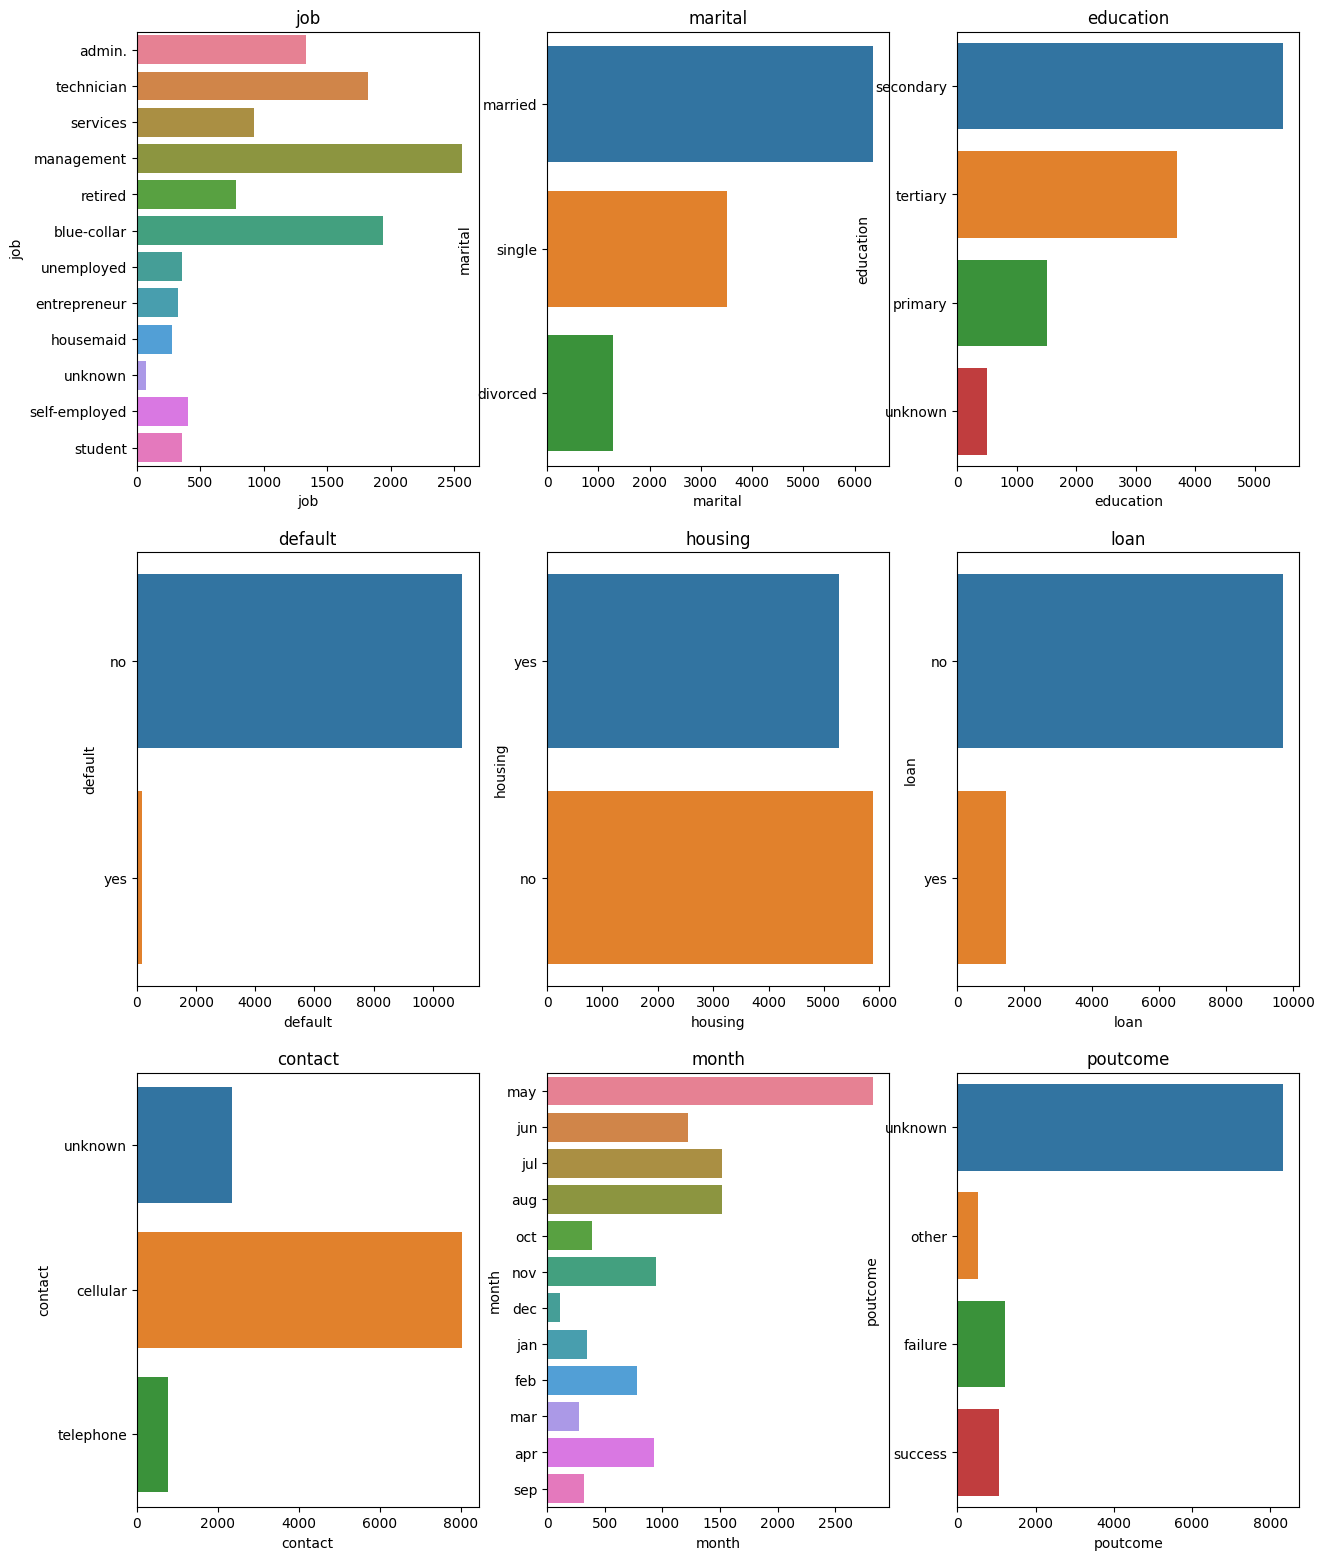

In [ ]:
# Check count based on categorical feature

plt.figure(figsize=(15,80), facecolor='white')
plotnumber = 1
for categorical_feature in categorical_features:
  ax = plt.subplot(12,3, plotnumber)
  sns.countplot(y=categorical_feature, data=df, hue=categorical_feature)
  plt.xlabel(categorical_feature)
  plt.title(categorical_feature)
  plotnumber += 1
plt.show()



*   Client with job type as management records are high in given dataset and housemaid are very less
*   Client who married are high in records in given dataset and divorced are less
*   Client whoes education background is secondary are in high numbers in given dataset
*   Defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop
*   Data in month of may is high and less in dec

### 6. Relationship between Categorical Features and Label

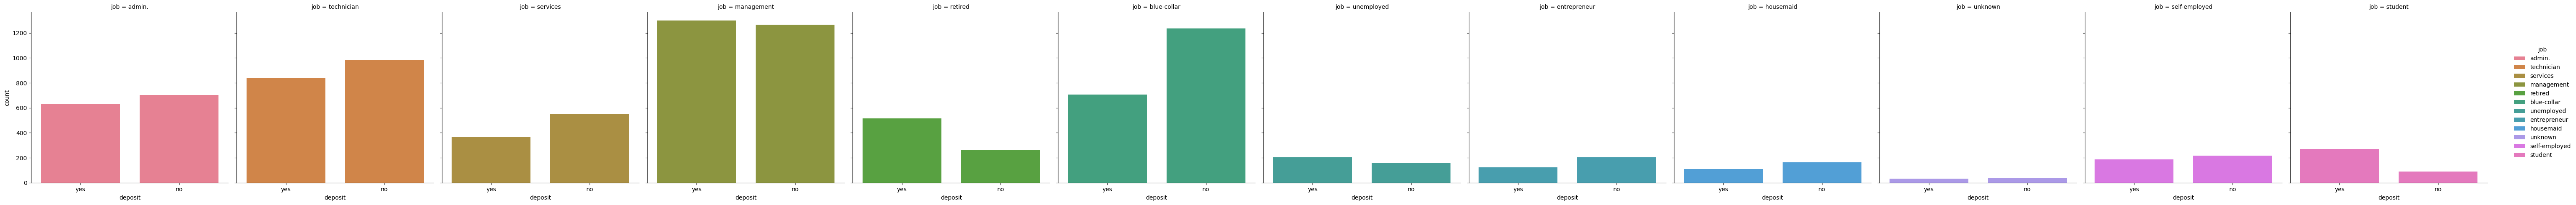

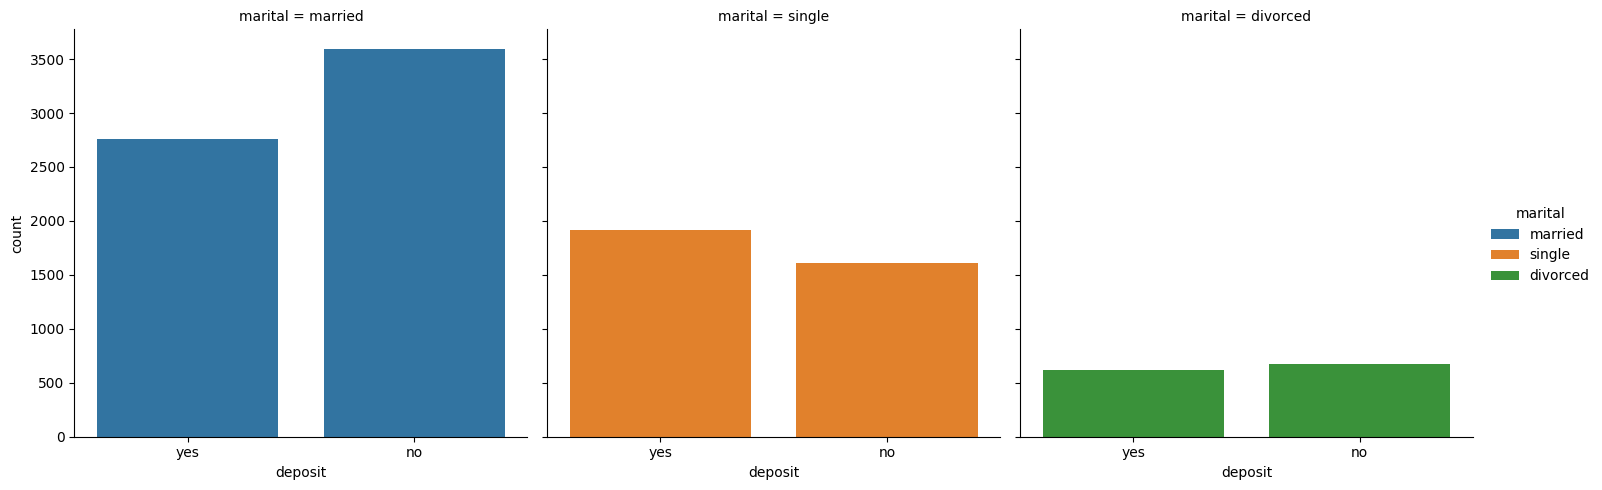

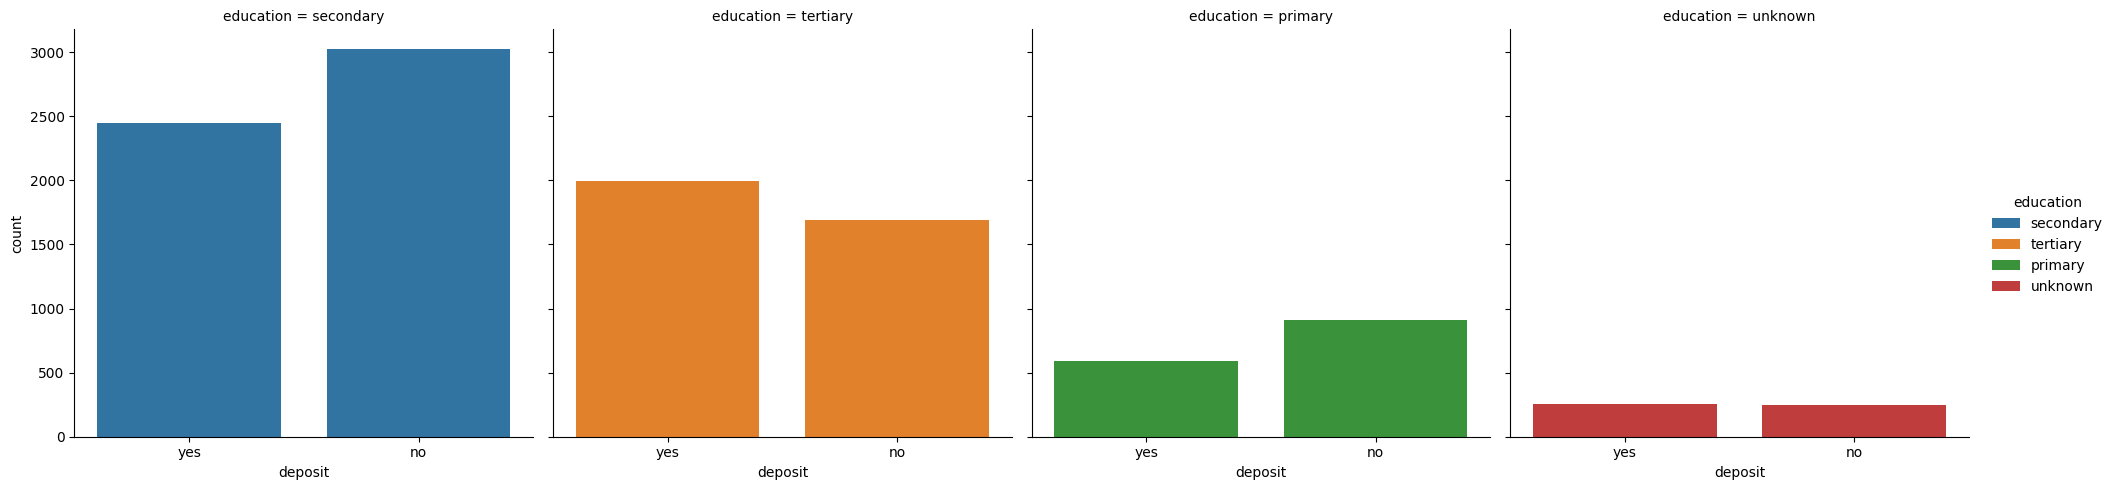

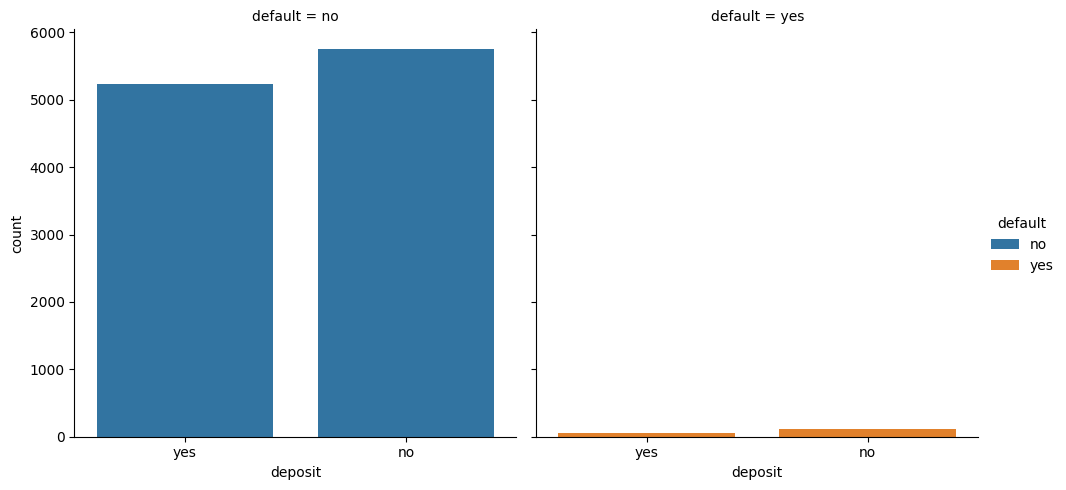

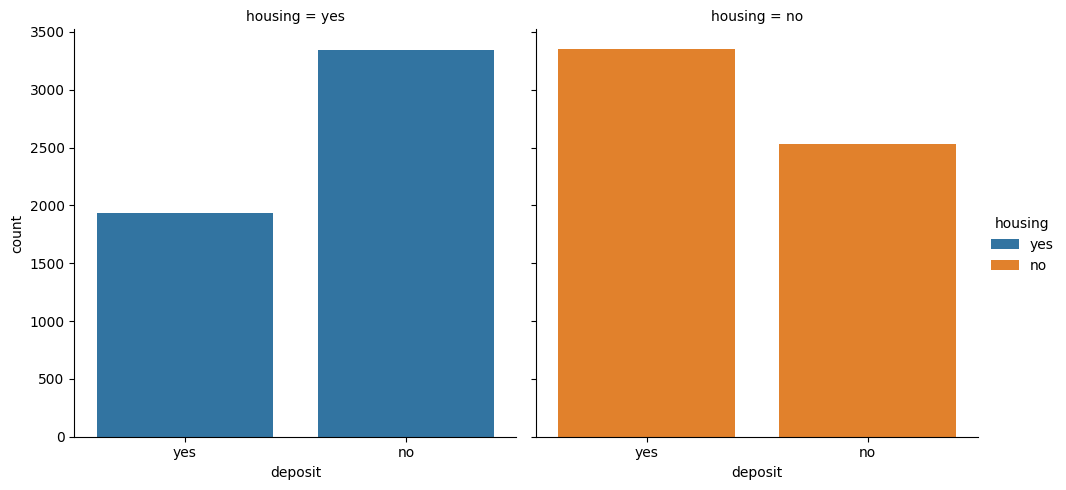

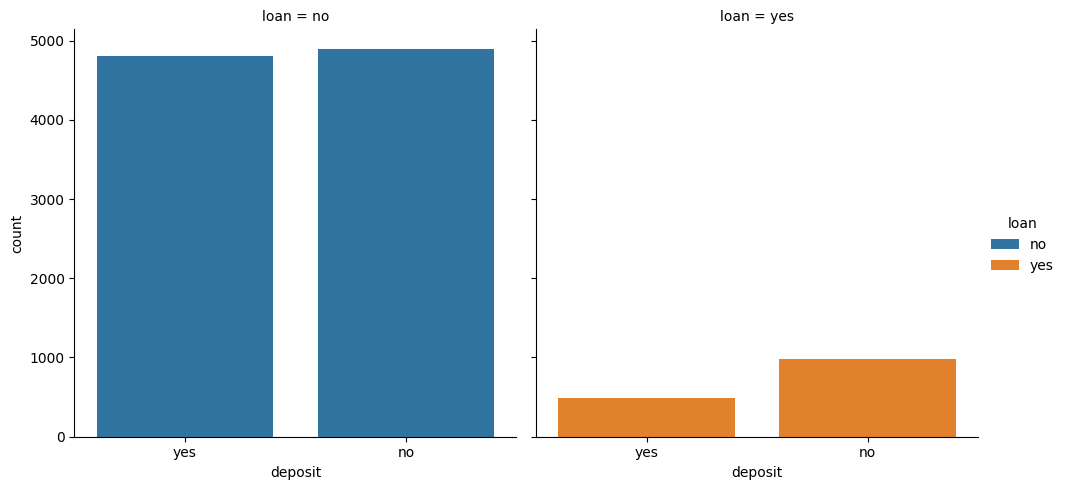

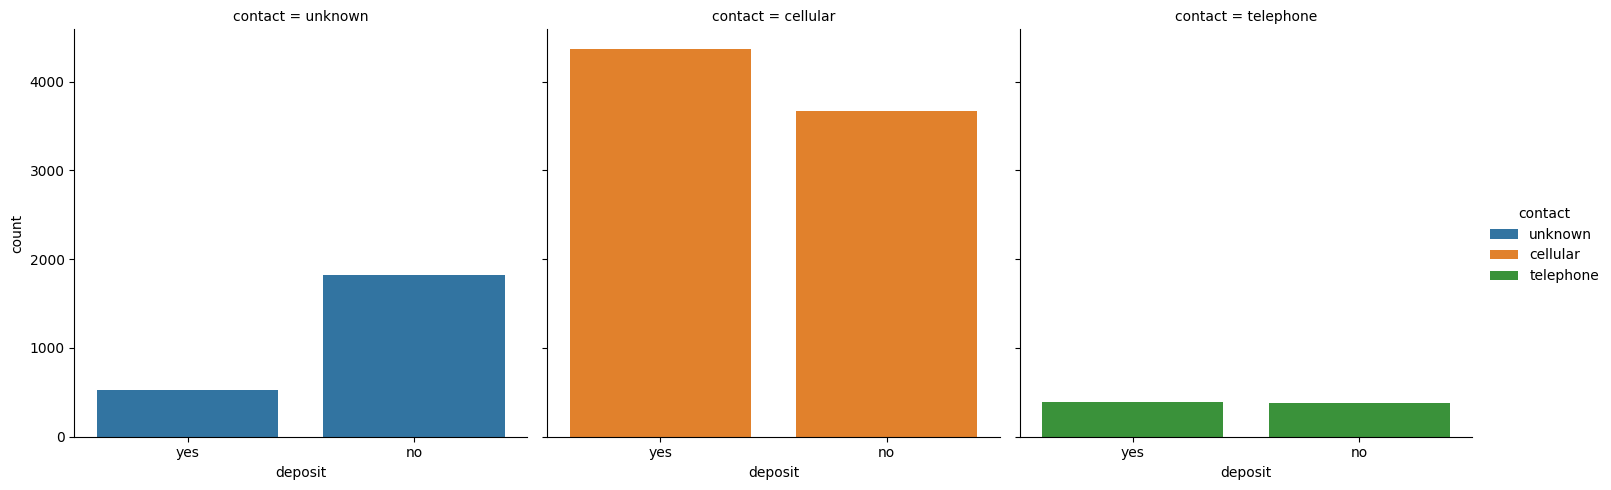

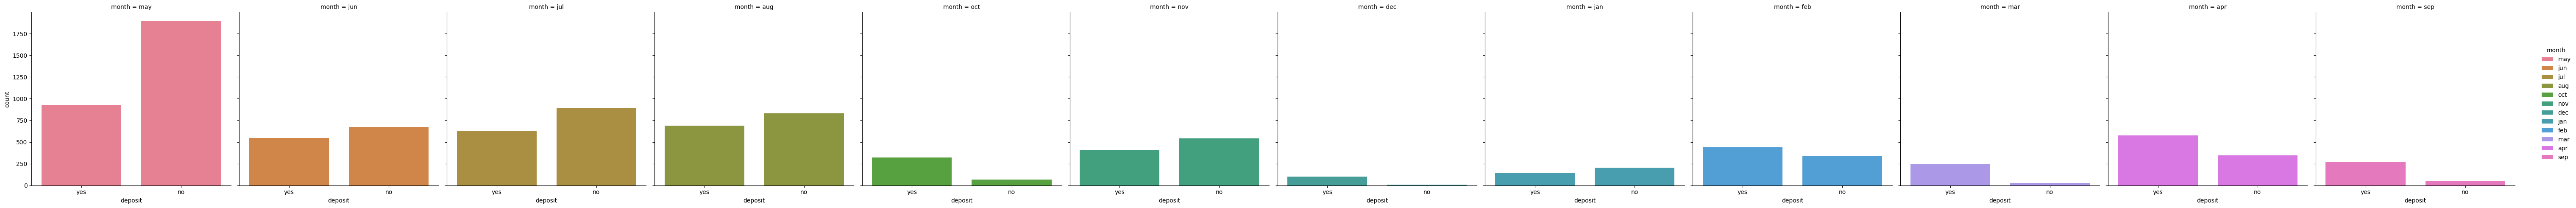

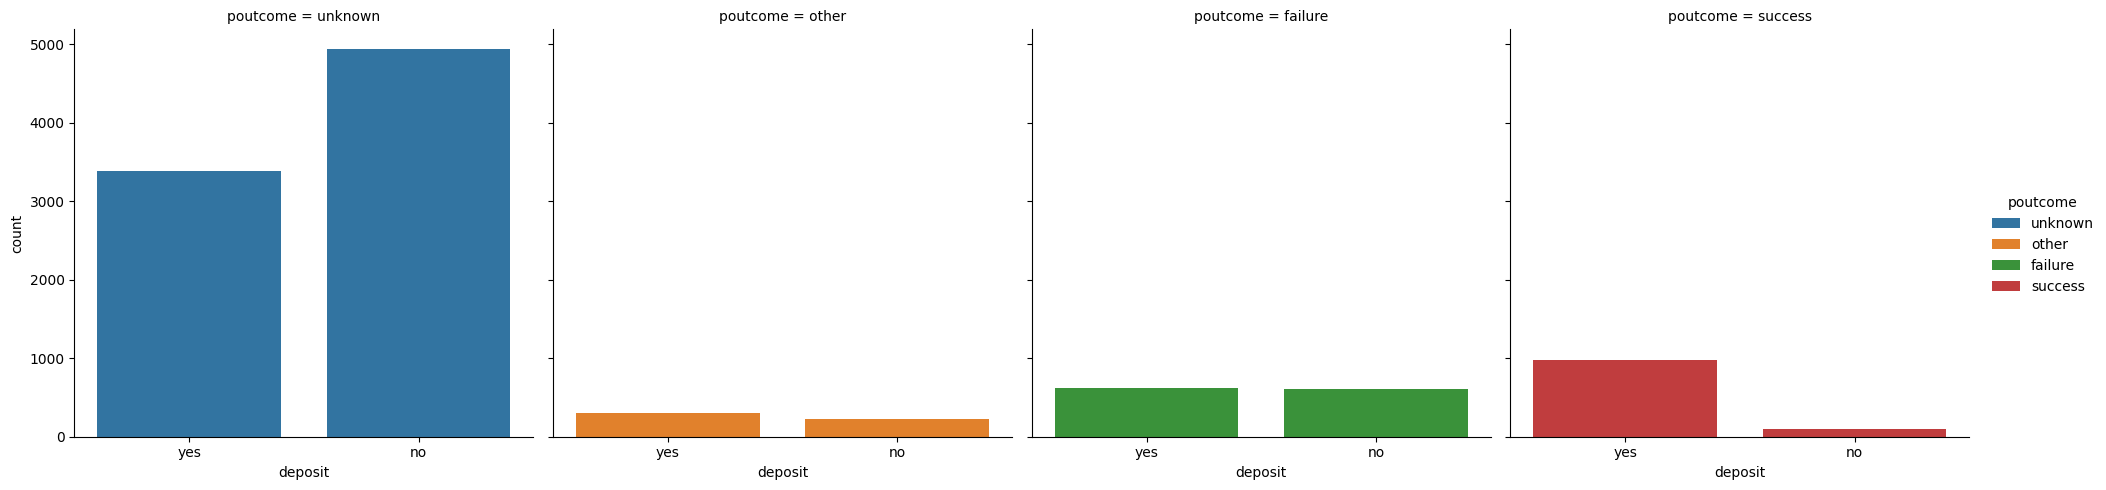

In [ ]:
#check target label split over categorical features
#Find out the relationship between categorical variable and target variable

for categorical_feature in categorical_features:
  sns.catplot(x='deposit', col=categorical_feature, kind='count', data=df, hue=categorical_feature)
plt.show()

In [ ]:
#Check target label split over categorical features and find the count

for categorical_feature in categorical_features:
  print(df.groupby(['deposit', categorical_feature]).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

*   Retired client has high interest on deposit
*   Client who has housing loan seems to be not interested much on deposit
*   If pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit
*   In month of March, September, October and December, client show high interest to deposit
*   In month of may, records are high but client interst ratio is very less

### 7. Explore the Numerical Features

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print(f'Number_of numerical variables: {len(numerical_features)}')

Number_of numerical variables: 7


In [ ]:
# visualise the numerical variables in dataframe
df[numerical_features].head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


### 8. Find Discrete Numerical Features

In [ ]:
discrete_numericals = [feature for feature in numerical_features if (df[feature].nunique() < 25)]
print(f'Discrete numerical feature count: {len(discrete_numericals)}')

Discrete numerical feature count: 0


There is no Discrete Variables in give dataset

### 9. Find Continuous Numerical Features

In [ ]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_numericals+['deposit']]
print(f'Continuous feature count: {len(continuous_feature)}')

Continuous feature count: 7


There are 7 continuous numerical features

### 10. Distribution of Continous Numerical Features

In [ ]:
import warnings
warnings.simplefilter('ignore')

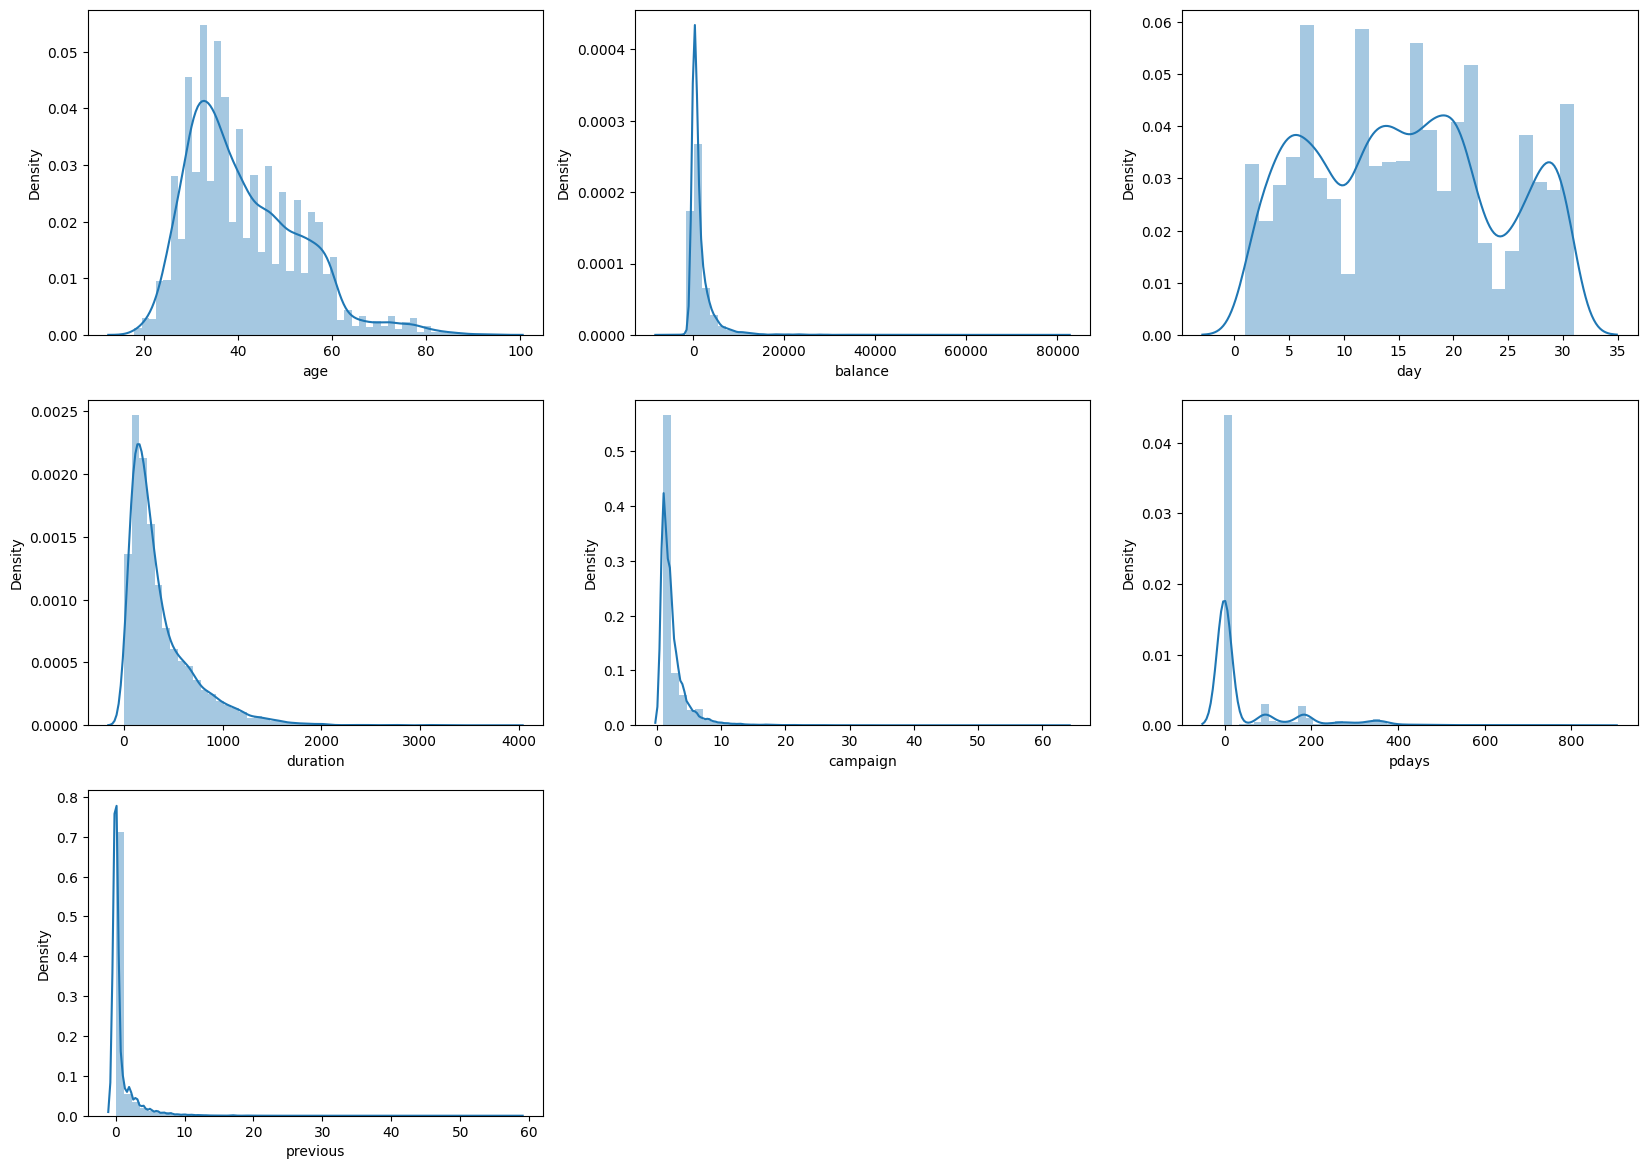

In [ ]:
#plot a univariate distribution of continues observations

plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for feature in continuous_feature:
  ax = plt.subplot(12,3, plotnumber)
  sns.distplot(df[feature])
  plt.xlabel(feature)
  plotnumber += 1
plt.show()

*   It seems age, days distributed normally
*   Balance, duration, compaign, pdays and previous heavely skewed towards left and seems to be have some outliers.

### 11. Relation between Continous numerical Features and Labels

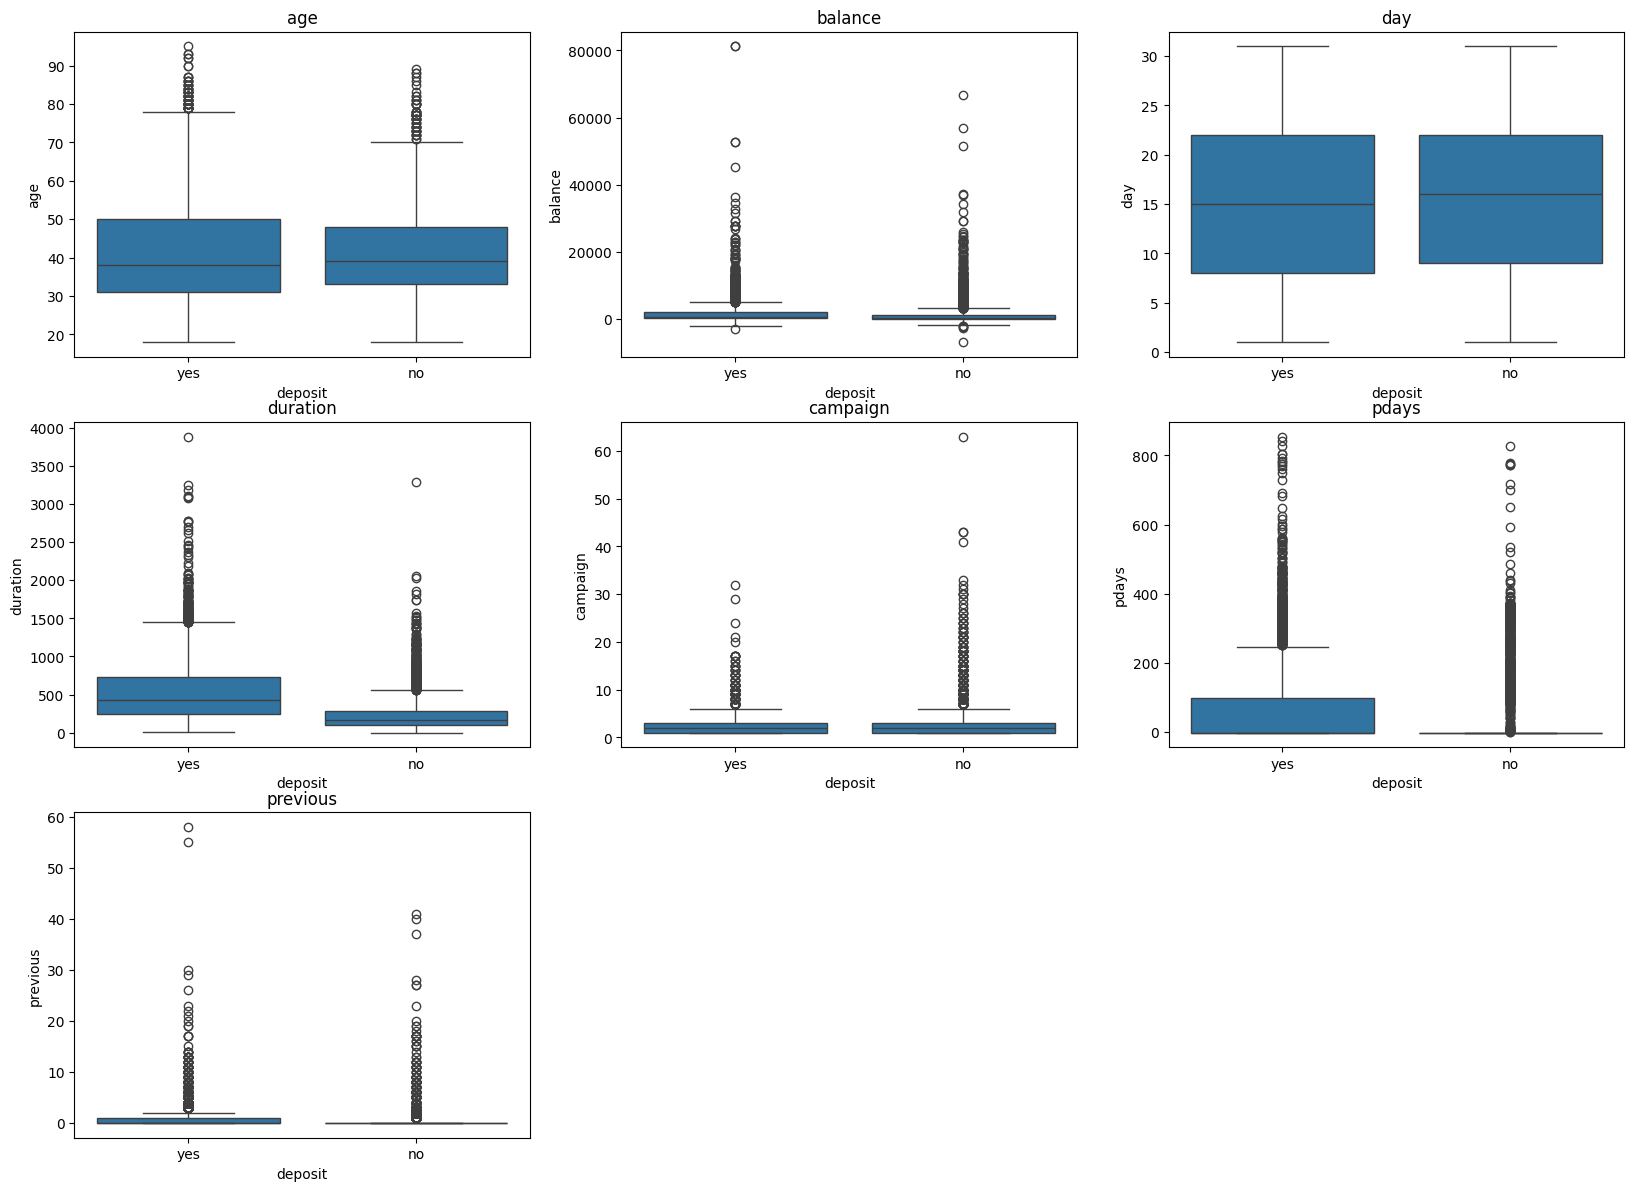

In [ ]:
#boxplot to show target distribution with respect to numerical features

plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for feature in continuous_feature:
  ax = plt.subplot(12,3, plotnumber)
  sns.boxplot(x='deposit', y=df[feature], data=df)
  plt.title(feature)
  plotnumber += 1
plt.show()

### 12. Find Outliers in numerical features

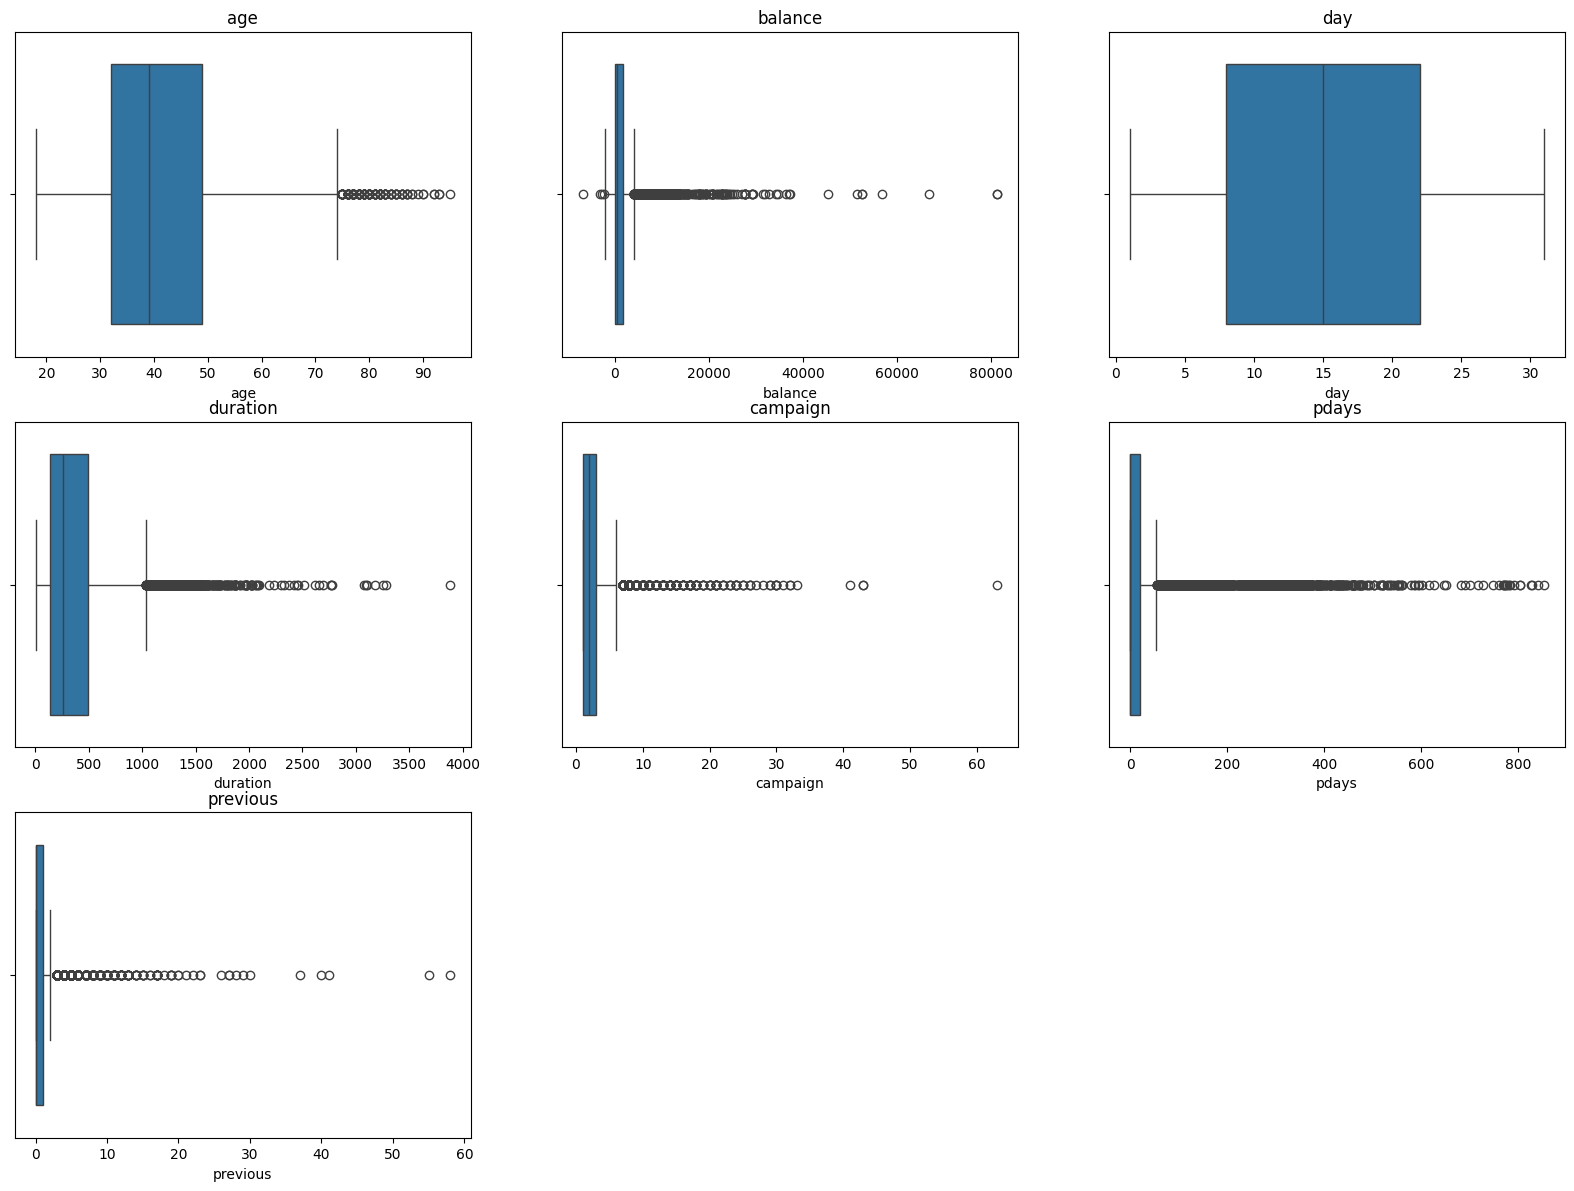

In [ ]:
#boxplot on numerical features to find outliers

plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
  ax = plt.subplot(12,3, plotnumber)
  sns.boxplot(x=df[numerical_feature])
  plt.title(numerical_feature)
  plotnumber += 1
plt.show()

Age, balance, duration, compaign, pdays and previous has some outliers

### 13. Explore the Correlation between numerical features

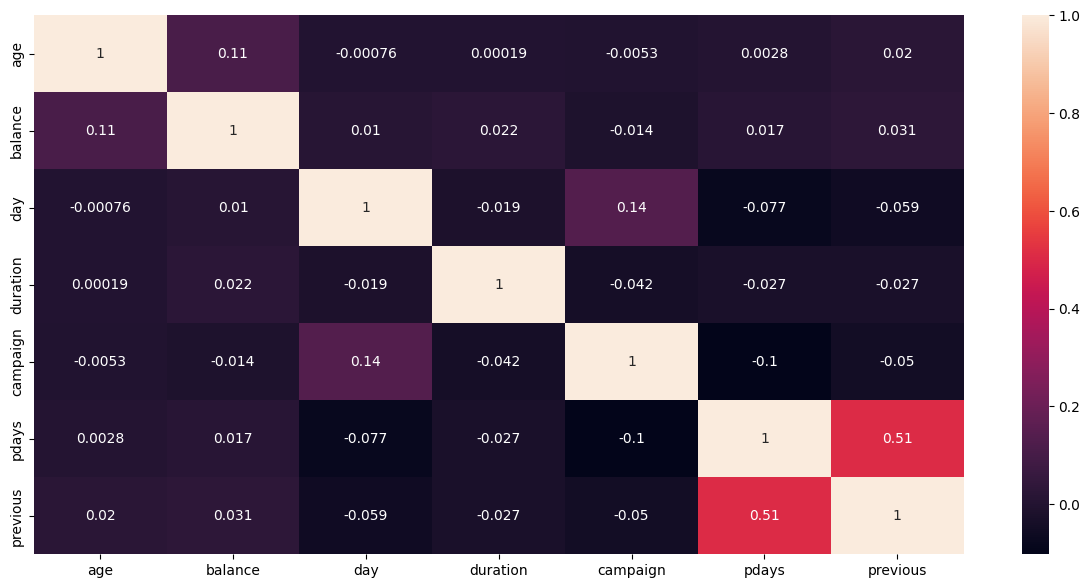

In [ ]:
## Checking for correlation

corr_mat = df[numerical_features].corr()

plt.figure(figsize=(15,7))
sns.heatmap(corr_mat, annot=True)
plt.show()

It seems no feature is heavily correlated with other features

### 14. Check the Data set is balanced or not based on target values in classification

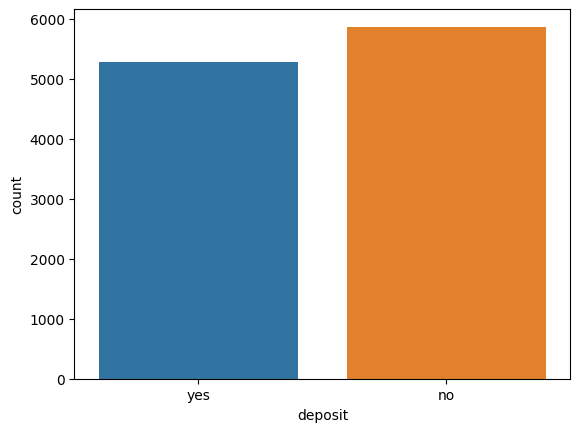

In [ ]:
sns.countplot(x=df['deposit'], hue=df['deposit'])
plt.show()

In [ ]:
df['deposit'].groupby(df['deposit']).count()

,deposit
deposit,
no,5873
yes,5289


In [ ]:
df['deposit'].value_counts()

,count
deposit,
no,5873
yes,5289


Given dataset seems to be balanced.

## Feature Engineering

*   Drop unwanted Features
*   Handle Missing Values
*   Handle Categorical Features
*   Handle Feature Scalling
*   Remove Outliers

In [ ]:
df2 = df.copy()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df2.shape

(11162, 17)

In [ ]:
#defaut features does not play imp role
df2.groupby(['deposit', 'default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [ ]:
# Removing 'default' column
df2.drop(['default'], axis=1, inplace=True)

In [ ]:
df2.shape

(11162, 16)

In [ ]:
# Analysing 'pdays' column
print(df2.groupby(['deposit', 'pdays']).size())

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64


In [ ]:
# drop pdays as it has -1 value for around 40%+
df2.drop(['pdays'], axis=1, inplace=True)

In [ ]:
df2.shape

(11162, 15)

In [ ]:
# remove outliers in feature age...
print(df2.groupby(['age'], sort=True)['age'].count())
# these can be ignored as values lies in between 18 to 95

age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64


In [ ]:
# remove outliers in feature balance...
print(df.groupby(['deposit', 'balance'], sort=True)['balance'].count())
# these outlier should not be remove as balance goes high, client show interest on deposit

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64


In [ ]:
# remove outliers in feature duration...
print(df2.groupby(['deposit', 'duration'], sort=True)['duration'].count())
# these outlier should not be remove as duration goes high, client show interest on deposit

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64


In [ ]:
# remove outliers in feature campaign...
print(df2.groupby(['deposit', 'campaign'], sort=True)['campaign'].count())

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [ ]:
df3 = df2[df2['campaign'] < 33]
df3.shape

(11157, 15)

In [ ]:
# remove outliers in feature previous...
print(df3.groupby(['deposit', 'previous'], sort=True)['previous'].count())

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [ ]:
df4 = df3[df3['previous'] < 31]
df4.shape

(11152, 15)

In [ ]:
print(df4.groupby(['deposit', 'previous'], sort=True)['previous'].count())

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10            26
         11            15
         12            10
         13         

In [ ]:
# One hot encoding categorical columns:

cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

for col in cat_columns:
  df4 = pd.concat([df4.drop(col, axis=1), pd.get_dummies(df4[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False, dtype='int')], axis=1)

In [ ]:
df4.head()

,age,balance,housing,loan,day,duration,campaign,previous,deposit,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,yes,no,5,1042,1,0,yes,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,no,no,5,1467,1,0,yes,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,yes,no,5,1389,1,0,yes,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,yes,no,5,579,1,0,yes,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,no,no,5,673,2,0,yes,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
# Encoding boolean columns:

bool_columns = ['housing', 'loan', 'deposit']

for col in bool_columns:
  df4[col+'_new'] = df4[col].apply(lambda x: 1 if x == 'yes' else 0)
  df4.drop(col, axis=1, inplace=True)

In [ ]:
df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59,2343,5,1042,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
1,56,45,5,1467,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,41,1270,5,1389,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
3,55,2476,5,579,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
4,54,184,5,673,2,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


## Training the model

### 1. Split data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

X = df4.drop(['deposit_new'], axis=1)
y = df4['deposit_new']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
len(X_train)/len(X)*100

79.99461979913917

In [ ]:
len(y_test)/len(y)*100

20.00538020086083

### 2. Model Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# RandomForest

model_score = cross_val_score(estimator=RandomForestClassifier(), X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.85266106 0.84585202 0.84865471 0.84641256 0.85482063]
0.8496801949479342


In [ ]:
# XGBoost

model_score = cross_val_score(estimator=XGBClassifier(), X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.85658263 0.85762332 0.85313901 0.85650224 0.86154709]
0.8570788584492093


**Using gridsearch**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create Param
model_param = {
    'RandomForestClassifier': {
    'model': RandomForestClassifier(),
    'param': {
        'n_estimators': [10, 50, 100, 130],
        'criterion': ['gini', 'entropy'],
        'max_depth': range(2,4,1),
        'max_features': ['auto', 'log2']
    }
  },
    'XGBoostClassifier': {
        'model': XGBClassifier(objective='binary:logistic'),
        'param': {
            'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

Implementing GridSearch

In [ ]:
scores = []
for model_name, mp in model_param.items():
  model_selection = GridSearchCV(estimator=mp['model'], param_grid=mp['param'], cv=5, return_train_score=False)
  model_selection.fit(X,y)
  scores.append({
      'model': model_name,
      'best_score': model_selection.best_score_,
      'best_params': model_selection.best_params_
  })

In [ ]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.726973365520097,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 130}},
 {'model': 'XGBoostClassifier',
  'best_score': 0.8151087509271114,
  'best_params': {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}}]

XGboost performs better

### 3. Model Building

In [ ]:
model_xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.1, max_depth=10, n_estimators=100)

In [ ]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
model_xgb.score(X_test,y_test)

0.8565665620797849

In [ ]:
# Get feature importance from the model

headers = ['name', 'score']
values = sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importance = pd.DataFrame(values, columns=headers)

In [ ]:
xgb_feature_importance

,name,score
0,poutcome_success,0.181078
1,contact_unknown,0.128978
2,month_mar,0.080409
3,duration,0.047407
4,month_oct,0.042526
5,housing_new,0.035877
6,month_jul,0.032267
7,month_jun,0.029442
8,month_jan,0.028331
9,month_nov,0.025325


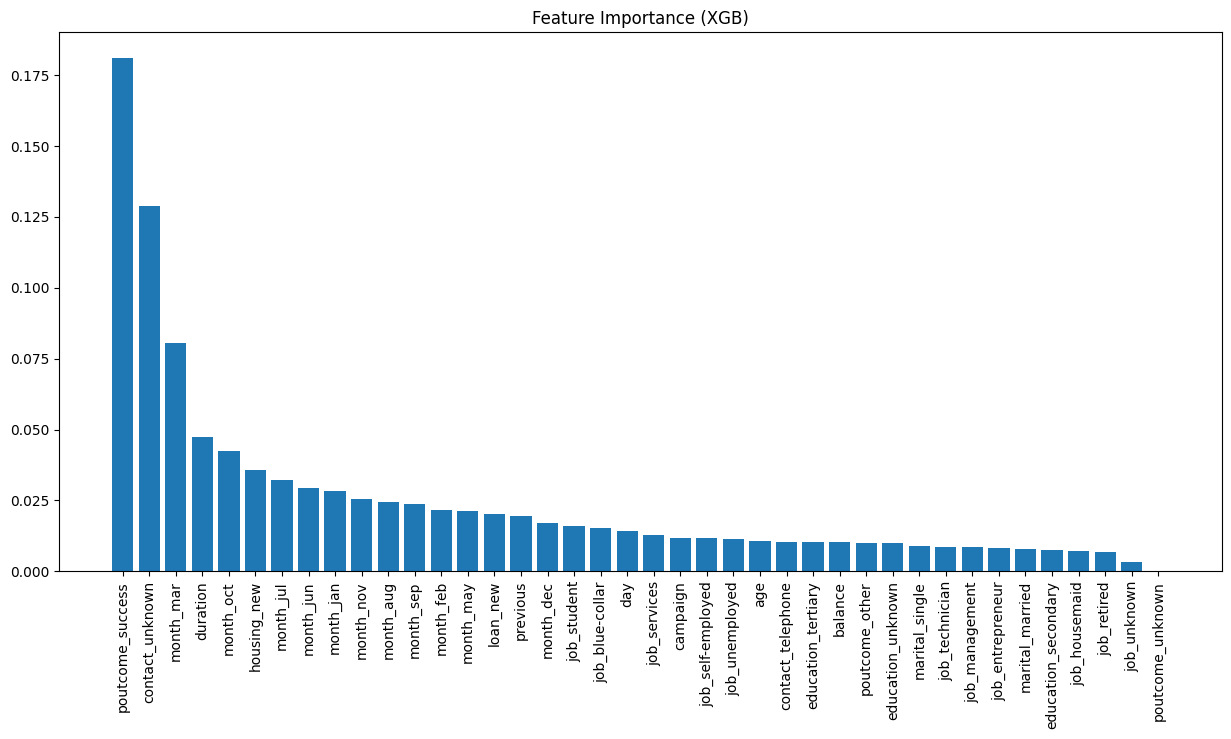

In [ ]:
# Plot feature importance

plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importance))
plt.bar(x_pos, xgb_feature_importance['score'])
plt.xticks(x_pos, xgb_feature_importance['name'])
plt.xticks(rotation=90)
plt.title('Feature Importance (XGB)')
plt.show()

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[989, 190],
       [130, 922]])

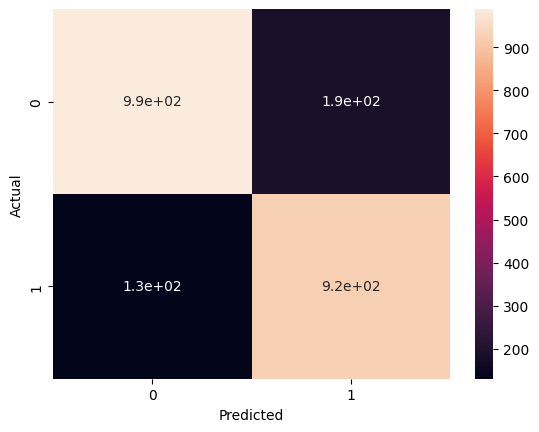

In [ ]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()